In [ ]:
import numpy as np

In [ ]:
x_train = np.array([1,1,2])
y_train = np.array([1,2,3])
print(x_train, y_train)
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
print(x_train, '\n', y_train)

[1 1 2] [1 2 3]
[[1]
 [1]
 [2]] 
 [[1]
 [2]
 [3]]


In [ ]:
ones = np.ones((x_train.shape[0],1))
print(ones)
x_train = np.concatenate((ones, x_train), axis=1)
print(x_train)

[[1.]
 [1.]
 [1.]]
[[1. 1.]
 [1. 1.]
 [1. 2.]]


In [ ]:
LHS = np.dot(np.transpose(x_train), x_train) # X^T X
print(LHS)
RHS = np.dot(np.transpose(x_train), y_train) # X^T Y
print(RHS)

[[3. 4.]
 [4. 6.]]
[[6.]
 [9.]]


In [ ]:
betas = np.dot(np.linalg.inv(LHS), RHS)
print(betas)

[[0. ]
 [1.5]]


In [ ]:
def SimpleLR(x_train, y_train):
  x_train = x_train.reshape(len(x_train),1)
  y_train = y_train.reshape(len(y_train),1)

  ones = np.ones((x_train.shape[0],1))
  x_train = np.concatenate((ones, x_train), axis=1)

  LHS = np.dot(np.transpose(x_train), x_train) # X^T X
  RHS = np.dot(np.transpose(x_train), y_train) # X^T Y

  betas = np.dot(np.linalg.inv(LHS), RHS)
  return betas

In [ ]:
x_train = np.array([1,1,2])
y_train = np.array([1,2,3])
res = SimpleLR(x_train, y_train)
beta0 = res[0]
beta1 = res[1]
print('intercept', beta0)
print('coef', beta1)

intercept [0.]
coef [1.5]


[0.  0.5 1.  1.5 2.  2.5 3.  3.5] 
 [0.   0.75 1.5  2.25 3.   3.75 4.5  5.25]


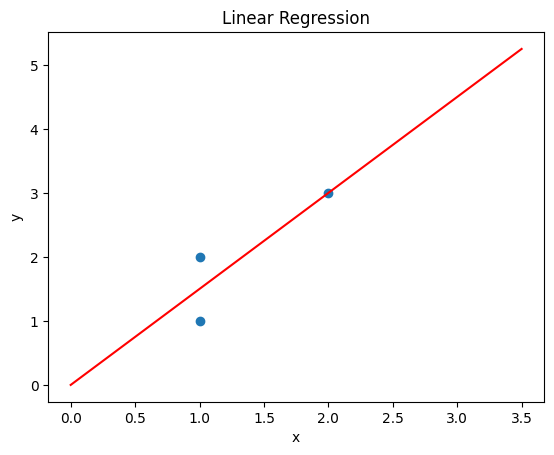

In [ ]:
import matplotlib.pyplot as plt

f = lambda x: beta0 + beta1*x
xfit = np.arange(0,4,0.5)
yfit = f(xfit)
print(xfit, '\n', yfit)

# plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.scatter(x_train, y_train)
plt.plot(xfit, yfit, 'r-')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn import linear_model, datasets
x_train = np.array([1,1,2])
y_train = np.array([1,2,3])
def LRUsingScikit(x_train, y_train):
  x_train = x_train.reshape(len(x_train),1)
  y_train = y_train[:,np.newaxis]
  regr = linear_model.LinearRegression() #model
  regr.fit(x_train, y_train)
  return regr
res = LRUsingScikit(x_train, y_train)
print(res.intercept_, res.coef_[0])

[-4.4408921e-16] [1.5]


[4.17022005e+00 7.20324493e+00 1.14374817e-03] [ 2.65326739  8.56128423 -5.66895863]


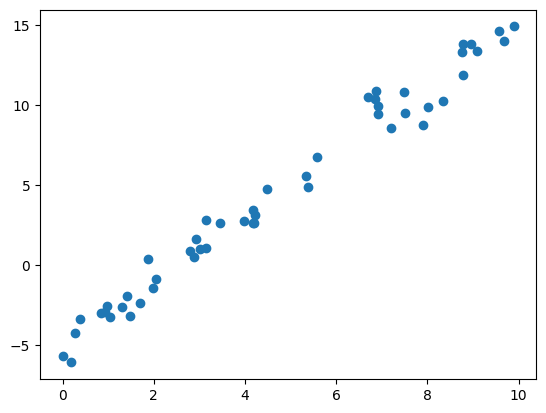

In [ ]:
rng = np.random.RandomState(1) #seed
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50) # y=2x-5 + error
print(x[:3],y[:3])
plt.scatter(x, y)
plt.show()

coef 2.0272088103606953
intercept -4.998577085553204


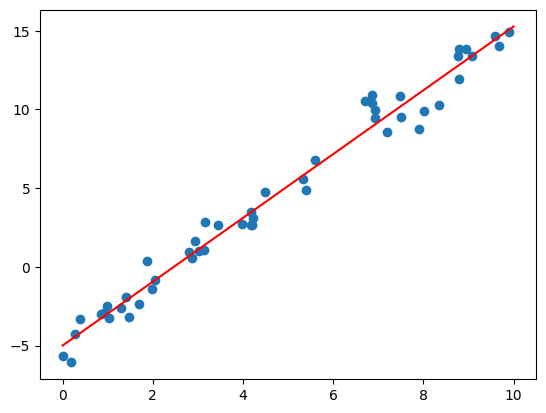

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

def SimpleLRUsingScikit(x,y):
  model.fit(x[:,np.newaxis], y)
  print("coef", model.coef_[0])
  print("intercept",model.intercept_)

  xfit = np.linspace(0, 10, 1000) #xtest
  yfit = model.predict(xfit[:, np.newaxis])

  plt.scatter(x, y)
  plt.plot(xfit, yfit,'red')
SimpleLRUsingScikit(x,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2,3])
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x[:,np.newaxis])

ones = np.ones((len(x),1))
x_f = np.concatenate((ones, x_poly), axis=1)
print(x_poly, '\n', x_f)

[[ 2.  4.  8.]
 [ 3.  9. 27.]] 
 [[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


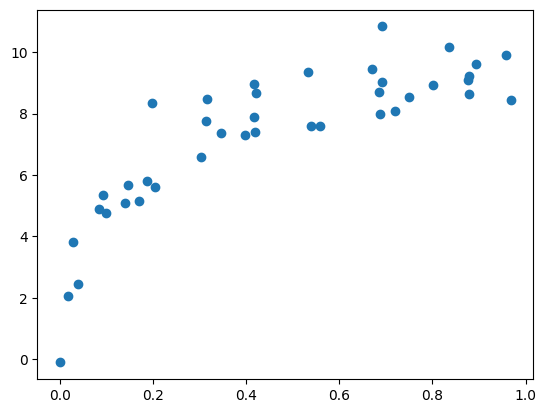

In [ ]:
def MakeData(N):
  rng = np.random.RandomState(1)
  x = rng.rand(N,1)
  y = (10 - (1/(x.ravel()+0.1))) + rng.randn(N)
  return x, y
x,y = MakeData(40)
plt.scatter(x,y)
plt.show()

In [ ]:
x_poly = poly.fit_transform(x)
print(x[:1], x_poly[:1])

[[0.417022]] [[0.417022   0.17390735 0.07252319]]


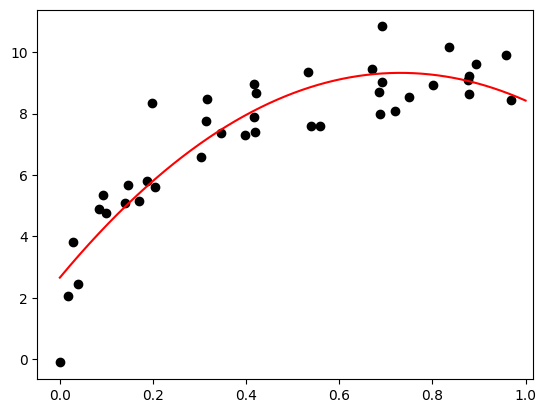

In [ ]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

x,y = MakeData(40)
plt.scatter(x.ravel(),y, color='black')

x_test = np.linspace(0, 1, 1000)[:,np.newaxis]
y_test = PolynomialRegression(2).fit(x,y).predict(x_test)
lim = plt.axis()
plt.plot(x_test, y_test, 'red')
plt.axis(lim)
plt.show()

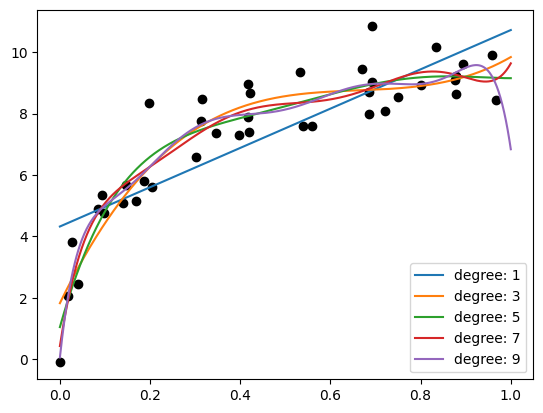

In [ ]:
plt.scatter(x.ravel(),y, color='black')
for degree in [1,3,5,7,9]:
  y_test = PolynomialRegression(degree).fit(x,y).predict(x_test)
  plt.plot(x_test, y_test, label='degree: '+str(degree))
lim = plt.axis()
plt.axis(lim)
plt.legend(loc='best')

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.70320587 0.67717023 0.65210807 0.73903767 0.6416529  0.66977128
  0.67177854]] [[-3.67376699e-01 -2.06152821e-02 -7.62819911e-06 -4.53042823e-01
  -7.68371810e-02 -4.48004625e-01 -5.65525114e-03]
 [ 4.79389448e-01  6.72161188e-01  8.91520809e-01 -2.22442021e-01
   7.90184762e-01  6.30242423e-01  7.00156092e-01]]


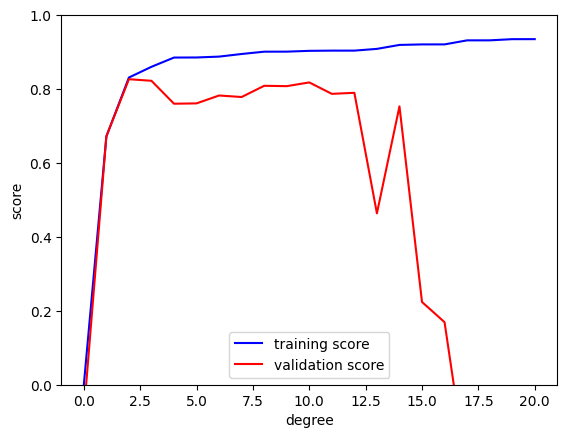

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), x, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)
print(train_score[:2], val_score[:2])

# lim = plt.axis()
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
# plt.axis(lim)
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')
plt.ylim(0,1)
plt.show()


{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}


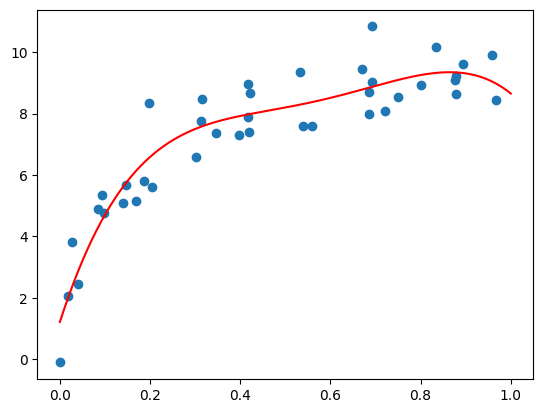

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(PolynomialRegression(),
                    param_grid={'polynomialfeatures__degree': np.arange(21),
                                'linearregression__fit_intercept': [True, False]},
                    cv=7)
grid.fit(x,y)
print(grid.best_params_)

model = grid.best_estimator_
plt.scatter(x,y)
y_test = model.fit(x,y).predict(x_test)
plt.plot(x_test, y_test, 'red')
plt.show()